In [ ]:
# importing necessary libraries
import pandas as pd
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# titleType

In [ ]:
#reading the train_dataset
train_df = pd.read_csv('train10.csv')

#reading the test dataset
test_df = pd.read_csv('test2.csv')

In [ ]:
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','titleType'], axis = 1)
y_train = train_df['titleType']
X_test = test_df.drop(['originalTitle','titleType'], axis = 1)
y_test = test_df['titleType']

# Encoding the Species column to get numerical class
#le = LabelEncoder()
#y_train = le.fit_transform(y_train)
#y_test = le.fit_transform(y_test)

In [ ]:
# startign with default values
#Initialize the classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predictions
y_pred = gnb.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.38961038961038963
Classification Report:
               precision    recall  f1-score   support

       movie       0.88      0.17      0.29      1795
       short       0.60      0.38      0.47       760
   tvEpisode       0.49      0.57      0.53      1597
tvMiniSeries       0.25      0.08      0.12        75
     tvMovie       0.10      0.16      0.12       299
    tvSeries       0.85      0.96      0.90       409
     tvShort       0.01      0.69      0.02        16
   tvSpecial       0.12      0.27      0.16        48
       video       0.66      0.27      0.39       222
   videoGame       0.10      0.20      0.13        92

    accuracy                           0.39      5313
   macro avg       0.40      0.38      0.31      5313
weighted avg       0.63      0.39      0.42      5313



In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Define a grid of possible priors
# Ensure that all priors are lists of 10 values summing to 1
priors_grid = [
    [0.1] * 10,  # Equal priors
    [0.1] + [0.1] * 9,  # One class with a higher prior
    [0.05] * 5 + [0.15] * 5,  # Half classes have lower priors, the other half higher
    [0.55] + [0.05] * 9  # One dominant class
]

# Define the parameter grid for fine-tuning
param_grid = {
    'var_smoothing': np.logspace(-9, 0, 10),  # Testing variance smoothing from 1e-9 to 1
    'priors': priors_grid
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best model and parameters
best_gnb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'priors': [0.55, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], 'var_smoothing': 0.1}


In [ ]:
# startign with GridSearchCv parameter values
#Initialize the classifier
gnb = GaussianNB(priors = [0.55, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05], var_smoothing =0.1)

# Train the model
gnb.fit(X_train, y_train)

# Predictions
y_pred = gnb.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.5605119518162996
Classification Report:
               precision    recall  f1-score   support

       movie       0.78      0.65      0.71      1795
       short       0.72      0.33      0.46       760
   tvEpisode       0.75      0.66      0.70      1597
tvMiniSeries       0.32      0.75      0.45        75
     tvMovie       0.14      0.09      0.11       299
    tvSeries       0.94      0.71      0.81       409
     tvShort       0.02      0.69      0.03        16
   tvSpecial       0.07      0.73      0.13        48
       video       0.62      0.27      0.38       222
   videoGame       0.20      0.22      0.21        92

    accuracy                           0.56      5313
   macro avg       0.46      0.51      0.40      5313
weighted avg       0.71      0.56      0.61      5313



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'var_smoothing': np.logspace(-9, 0, 50),  # Range for var_smoothing
    'priors': [None] + [
    [0.1] * 10,  # Equal priors
    [0.1] + [0.1] * 9,  # One class with a higher prior
    [0.2]*2 +[0.075]*8,
    [0.05] * 5 + [0.15] * 5,  # Half classes have lower priors, the other half higher
    [0.55] + [0.05] * 9  # One dominant class

]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=gnb,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter settings to sample
    cv=5,       # 5-fold cross-validation
    scoring='accuracy',
    random_state=42,
    verbose=1
)

# Fit the model with random search
random_search.fit(X_train, y_train)

# Best model and parameters
best_gnb = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'var_smoothing': 0.18420699693267165, 'priors': None}


In [ ]:
# Using RandomizedSearchCV parameters
#Initialize the classifier
gnb = GaussianNB(priors = None, var_smoothing =0.18)

# Train the model
gnb.fit(X_train, y_train)

# Predictions
y_pred = gnb.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.6288349331827593
Classification Report:
               precision    recall  f1-score   support

       movie       0.82      0.49      0.61      1795
       short       0.67      0.67      0.67       760
   tvEpisode       0.53      0.92      0.67      1597
tvMiniSeries       0.50      0.01      0.03        75
     tvMovie       0.05      0.01      0.01       299
    tvSeries       0.85      1.00      0.92       409
     tvShort       0.00      0.00      0.00        16
   tvSpecial       0.17      0.12      0.14        48
       video       0.54      0.29      0.38       222
   videoGame       0.45      0.11      0.18        92

    accuracy                           0.63      5313
   macro avg       0.46      0.36      0.36      5313
weighted avg       0.64      0.63      0.60      5313



C:\Users\tanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

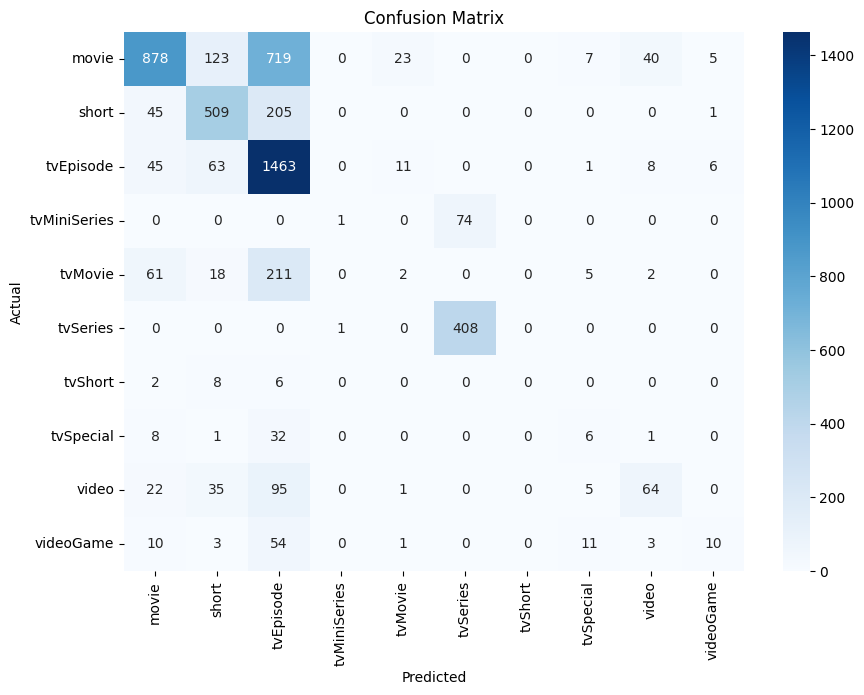

In [ ]:
import seaborn as sns
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gnb.classes_, yticklabels=gnb.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

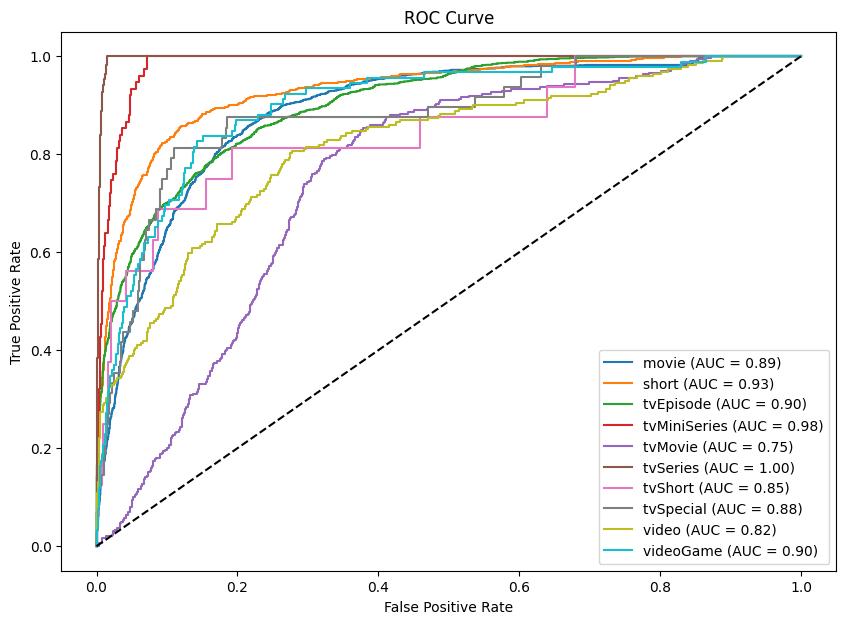

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=gnb.classes_)
y_pred_proba = gnb.predict_proba(X_test)  # Predicted probabilities

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i, class_label in enumerate(gnb.classes_):
    fpr[class_label], tpr[class_label], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves
plt.figure(figsize=(10, 7))
for class_label in gnb.classes_:
    plt.plot(fpr[class_label], tpr[class_label], label=f"{class_label} (AUC = {roc_auc[class_label]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()


In [ ]:
# Extract model parameters
theta = gnb.theta_  # Mean of each feature per class
sigma = gnb.var_  # Variance of each feature per class

# Compute feature importance
# Importance = Mean^2 / Variance for each feature and class
feature_importance = (theta ** 2) / sigma

# Aggregate importance across all classes (mean or sum)
global_importance = feature_importance.mean(axis=0)

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': global_importance
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

                        Feature  Importance
14                averageRating   28.401255
0                     startYear   23.653186
9               canHaveEpisodes   13.303399
16               countryEncoded   12.442802
1                runtimeMinutes   10.830986
15                genresEncoded    9.967168
6                  totalCredits    6.541357
13                  ratingCount    1.185008
3                      numVotes    1.183181
4                   totalImages    0.920751
11                   numRegions    0.358483
12             userReviewsTotal    0.258252
7            criticReviewsTotal    0.120001
8   awardNominationsExcludeWins    0.056585
2                     awardWins    0.043123
10                      isAdult    0.041752
5                   totalVideos    0.032454


In [ ]:
#dropping the least important features
X_train = train_df.drop(['originalTitle','titleType','totalImages','numRegions','userReviewsTotal','criticReviewsTotal','awardNominationsExcludeWins','awardWins','isAdult','totalVideos'], axis = 1)
y_train = train_df['titleType']
X_test = test_df.drop(['originalTitle','titleType','totalImages','numRegions','userReviewsTotal','criticReviewsTotal','awardNominationsExcludeWins','awardWins','isAdult','totalVideos'], axis = 1)
y_test = test_df['titleType']

#Initialize the classifier
gnb = GaussianNB(priors = None, var_smoothing =0.18)

# Train the model
gnb.fit(X_train, y_train)

# Predictions
y_pred = gnb.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.7071334462638811
Classification Report:
               precision    recall  f1-score   support

       movie       0.75      0.82      0.78      1795
       short       0.77      0.71      0.74       760
   tvEpisode       0.64      0.81      0.72      1597
tvMiniSeries       0.00      0.00      0.00        75
     tvMovie       0.00      0.00      0.00       299
    tvSeries       0.85      1.00      0.92       409
     tvShort       0.00      0.00      0.00        16
   tvSpecial       0.00      0.00      0.00        48
       video       0.28      0.22      0.25       222
   videoGame       0.57      0.04      0.08        92

    accuracy                           0.71      5313
   macro avg       0.39      0.36      0.35      5313
weighted avg       0.64      0.71      0.67      5313



C:\Users\tanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Recompute class weights for the resampled data
classes = np.unique(y_train_resampled)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train_resampled)
class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}

gnb.fit(X_train_resampled, y_train_resampled)

# Predictions and Evaluation
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       movie       0.91      0.48      0.63      1795
       short       0.68      0.27      0.39       760
   tvEpisode       0.73      0.61      0.67      1597
tvMiniSeries       0.26      0.87      0.40        75
     tvMovie       0.15      0.37      0.21       299
    tvSeries       0.96      0.54      0.69       409
     tvShort       0.02      0.75      0.03        16
   tvSpecial       0.06      0.58      0.11        48
       video       0.16      0.11      0.13       222
   videoGame       0.22      0.26      0.24        92

    accuracy                           0.47      5313
   macro avg       0.41      0.48      0.35      5313
weighted avg       0.72      0.47      0.55      5313



In [ ]:
y_train_resampled.value_counts()

titleType
tvEpisode       5279
videoGame       5279
movie           5279
tvSeries        5279
video           5279
tvMiniSeries    5279
short           5279
tvMovie         5279
tvSpecial       5279
tvShort         5279
Name: count, dtype: int64

# averageRating

In [ ]:
#reading the train_dataset
train_df = pd.read_csv('train11.csv')

#reading the test dataset
test_df = pd.read_csv('test3.csv')

In [ ]:
# Define mapping function
def categorize_rating(rating):
    if rating <= 4.5:
        return 'low'
    elif rating == 5.5:
        return 'average'
    elif rating == 6.5:
        return 'aboveAverage'
    elif rating == 7.5:
        return 'good'
    elif rating >= 8.5:
        return 'veryGood'

# Apply the mapping to the 'averageRating' column
train_df['averageRating'] = train_df['averageRating'].apply(categorize_rating)
test_df['averageRating'] = test_df['averageRating'].apply(categorize_rating)

In [ ]:
train_df['averageRating'].value_counts()

averageRating
good            4680
aboveAverage    4440
average         2717
veryGood        2336
low             1765
Name: count, dtype: int64

In [ ]:
#splitting the dataset into training and testing
X_train = train_df.drop(['originalTitle','averageRating'], axis = 1)
y_train = train_df['averageRating']
X_test = test_df.drop(['originalTitle','averageRating'], axis = 1)
y_test = test_df['averageRating']

In [ ]:
# startign with default values
#Initialize the classifier
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Predictions
y_pred = gnb.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.18068887634105024
Classification Report:
               precision    recall  f1-score   support

aboveAverage       0.34      0.04      0.08      1474
     average       0.29      0.04      0.07       909
        good       0.00      0.00      0.00      1569
         low       0.30      0.17      0.21       585
    veryGood       0.16      0.98      0.28       776

    accuracy                           0.18      5313
   macro avg       0.22      0.25      0.13      5313
weighted avg       0.20      0.18      0.10      5313



C:\Users\tanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\tanya\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [ ]:
from sklearn.model_selection import GridSearchCV

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Define a grid of possible priors
# Ensure that all priors are lists of 5 values summing to 1
priors_grid = [
    [0.2] * 5,  # Equal priors
    [0.4] + [0.15] * 4,  # One class with a higher prior
    [0.3] * 3 + [0.05] * 2  # Half classes have lower priors, the other half higher
]

# Define the parameter grid for fine-tuning
param_grid = {
    'var_smoothing': np.logspace(-9, 0, 10),  # Testing variance smoothing from 1e-9 to 1
    'priors': priors_grid
}

# Use GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=gnb, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Best model and parameters
best_gnb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters: {'priors': [0.3, 0.3, 0.3, 0.05, 0.05], 'var_smoothing': 1.0}


In [ ]:
# starting with GridSearchCv parameter values
#Initialize the classifier
gnb = GaussianNB(priors = [0.3, 0.3, 0.3, 0.05, 0.05], var_smoothing =0.1)

# Train the model
gnb.fit(X_train, y_train)

# Predictions
y_pred = gnb.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.32561641257293433
Classification Report:
               precision    recall  f1-score   support

aboveAverage       0.31      0.11      0.16      1474
     average       0.27      0.42      0.33       909
        good       0.36      0.71      0.48      1569
         low       0.27      0.02      0.04       585
    veryGood       0.26      0.08      0.12       776

    accuracy                           0.33      5313
   macro avg       0.29      0.27      0.22      5313
weighted avg       0.31      0.33      0.26      5313



In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Initialize the Gaussian Naive Bayes classifier
gnb = GaussianNB()

# Define the parameter distribution for RandomizedSearchCV
param_distributions = {
    'var_smoothing': np.logspace(-9, 0, 50),  # Range for var_smoothing
    'priors': [None] + [
    [0.2] * 5,  # Equal priors
    [0.4] + [0.15] * 4,  # One class with a higher prior
    [0.305]*2 +[0.13]*3,
    [0.3]*3+ [0.05] *2,  # Half classes have lower priors, the other half higher
]
}

# Use RandomizedSearchCV for hyperparameter tuning
random_search = RandomizedSearchCV(
    estimator=gnb,
    param_distributions=param_distributions,
    n_iter=20,  # Number of parameter settings to sample
    cv=5,       # 5-fold cross-validation
    scoring='accuracy',
    random_state=42,
    verbose=1
)

# Fit the model with random search
random_search.fit(X_train, y_train)

# Best model and parameters
best_gnb = random_search.best_estimator_
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'var_smoothing': 0.022229964825261957, 'priors': [0.3, 0.3, 0.3, 0.05, 0.05]}


In [ ]:
# Using RandomizedSearchCV parameters
#Initialize the classifier
gnb = GaussianNB(priors = [0.3,0.3,0.3,0.05,0.05], var_smoothing =0.02)

# Train the model
gnb.fit(X_train, y_train)

# Predictions
y_pred = gnb.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.3103707886316582
Classification Report:
               precision    recall  f1-score   support

aboveAverage       0.32      0.12      0.17      1474
     average       0.27      0.39      0.32       909
        good       0.40      0.46      0.43      1569
         low       0.36      0.09      0.14       585
    veryGood       0.23      0.46      0.31       776

    accuracy                           0.31      5313
   macro avg       0.32      0.30      0.27      5313
weighted avg       0.33      0.31      0.29      5313



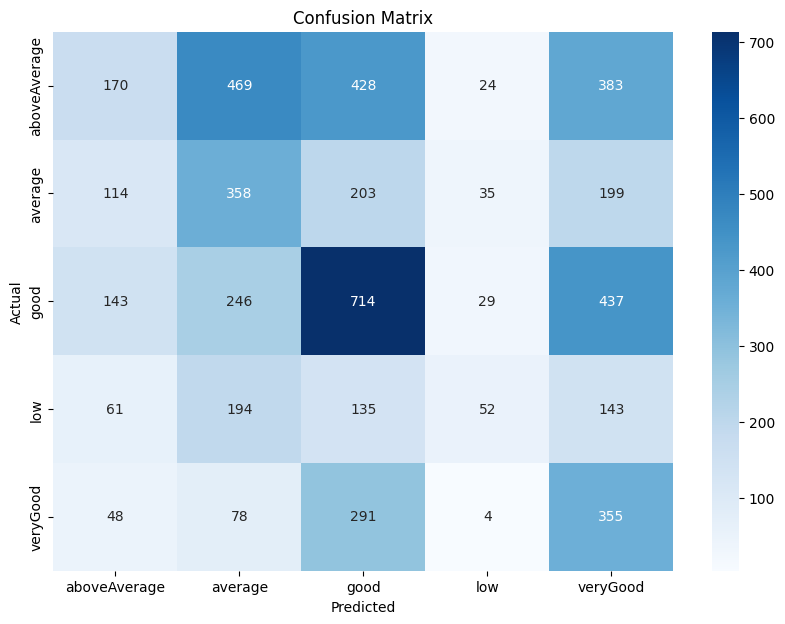

In [ ]:
import seaborn as sns
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=gnb.classes_)

# Plot confusion matrix
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=gnb.classes_, yticklabels=gnb.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

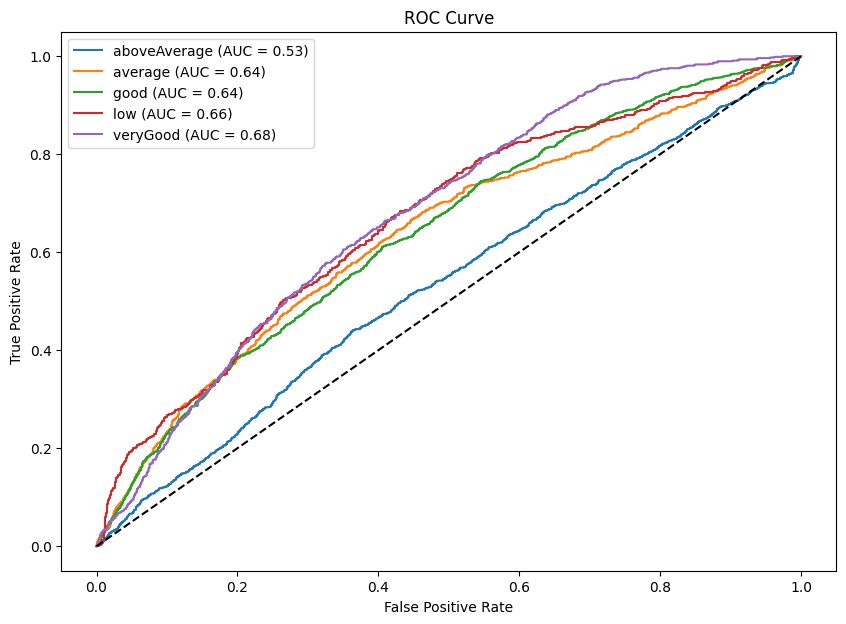

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np

# Binarize the output
y_test_binarized = label_binarize(y_test, classes=gnb.classes_)
y_pred_proba = gnb.predict_proba(X_test)  # Predicted probabilities

# Compute ROC curve and AUC for each class
fpr = {}
tpr = {}
roc_auc = {}
for i, class_label in enumerate(gnb.classes_):
    fpr[class_label], tpr[class_label], _ = roc_curve(y_test_binarized[:, i], y_pred_proba[:, i])
    roc_auc[class_label] = auc(fpr[class_label], tpr[class_label])

# Plot ROC curves
plt.figure(figsize=(10, 7))
for class_label in gnb.classes_:
    plt.plot(fpr[class_label], tpr[class_label], label=f"{class_label} (AUC = {roc_auc[class_label]:.2f})")

plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="best")
plt.show()


In [ ]:
# Extract model parameters
theta = gnb.theta_  # Mean of each feature per class
sigma = gnb.var_  # Variance of each feature per class

# Compute feature importance
# Importance = Mean^2 / Variance for each feature and class
feature_importance = (theta ** 2) / sigma

# Aggregate importance across all classes (mean or sum)
global_importance = feature_importance.mean(axis=0)

# Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': global_importance
}).sort_values(by='Importance', ascending=False)

# Display the feature importance
print(feature_importance_df)

                        Feature  Importance
14             titleTypeEncoded   24.346148
0                     startYear   22.526105
1                runtimeMinutes   12.965715
16               countryEncoded   12.953167
15                genresEncoded   10.589019
6                  totalCredits    9.530245
13                  ratingCount    1.789553
3                      numVotes    1.787286
4                   totalImages    1.219857
11                   numRegions    0.473588
12             userReviewsTotal    0.437980
7            criticReviewsTotal    0.270271
9               canHaveEpisodes    0.098500
8   awardNominationsExcludeWins    0.083155
2                     awardWins    0.077823
5                   totalVideos    0.069924
10                      isAdult    0.018387


In [ ]:
#dropping the least important features
X_train = train_df.drop(['originalTitle','averageRating','totalImages','numRegions','userReviewsTotal','criticReviewsTotal','canHaveEpisodes','awardNominationsExcludeWins','awardWins','isAdult','totalVideos'], axis = 1)
y_train = train_df['averageRating']
X_test = test_df.drop(['originalTitle','averageRating','totalImages','numRegions','userReviewsTotal','criticReviewsTotal','canHaveEpisodes','awardNominationsExcludeWins','awardWins','isAdult','totalVideos'], axis = 1)
y_test = test_df['averageRating']

#Initialize the classifier
gnb = GaussianNB(priors = None, var_smoothing =0.18)

# Train the model
gnb.fit(X_train, y_train)

# Predictions
y_pred = gnb.predict(X_test)

# Performance metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n",classification_report(y_test, y_pred))

Accuracy: 0.32674571805006586
Classification Report:
               precision    recall  f1-score   support

aboveAverage       0.31      0.33      0.32      1474
     average       0.33      0.10      0.15       909
        good       0.33      0.69      0.45      1569
         low       0.35      0.09      0.14       585
    veryGood       0.34      0.04      0.07       776

    accuracy                           0.33      5313
   macro avg       0.33      0.25      0.23      5313
weighted avg       0.33      0.33      0.27      5313



In [ ]:
from sklearn.utils.class_weight import compute_class_weight
from imblearn.over_sampling import SMOTE

# Handle class imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Recompute class weights for the resampled data
classes = np.unique(y_train_resampled)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train_resampled)
class_weight_dict = {cls: weight for cls, weight in zip(classes, class_weights)}

gnb.fit(X_train_resampled, y_train_resampled)

# Predictions and Evaluation
y_pred = gnb.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

aboveAverage       0.38      0.07      0.12      1474
     average       0.25      0.29      0.27       909
        good       0.35      0.40      0.37      1569
         low       0.19      0.18      0.19       585
    veryGood       0.23      0.47      0.31       776

    accuracy                           0.28      5313
   macro avg       0.28      0.28      0.25      5313
weighted avg       0.30      0.28      0.25      5313



In [ ]:
y_train_resampled.value_counts()

averageRating
good            4680
average         4680
veryGood        4680
aboveAverage    4680
low             4680
Name: count, dtype: int64